# Определение перспективного тарифа для телеком-компании

Компания «Мегалайн» — федерального оператора сотовой связи, предлагает клиентам два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Нам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В Нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.
<hr style="border: 2px solid blue;" />

## Изучение данных из файла

In [1]:
# добавим необходимые нам библиотеки 
import pandas as pd
import numpy as np
from scipy import stats as st
import math
import warnings
warnings.filterwarnings('ignore')

In [2]:
#прочитаем файлы и выведем общую информацию о них
try:
    df_calls = pd.read_csv('/datasets/calls.csv',  sep=',')
    df_internet = pd.read_csv('/datasets/internet.csv',  sep=',')
    df_messages = pd.read_csv('/datasets/messages.csv',  sep=',')
    df_tariffs = pd.read_csv('/datasets/tariffs.csv',  sep=',')
    df_users = pd.read_csv('/datasets/users.csv',  sep=',')
except:
    df_calls = pd.read_csv(r'C:\Users\User\Downloads\calls.csv',  sep=',')
    df_internet = pd.read_csv(r'C:\Users\User\Downloads\internet.csv',  sep=',')
    df_messages = pd.read_csv(r'C:\Users\User\Downloads\messages.csv',  sep=',')
    df_tariffs = pd.read_csv(r'C:\Users\User\Downloads\tariffs.csv',  sep=',')
    df_users = pd.read_csv(r'C:\Users\User\Downloads\users.csv',  sep=',')
    
dfs = [[df_calls, '<<<df_calls>>>'], [df_internet, '<<<df_internet>>>'], [df_messages, '<<<df_messages>>>'], 
       [df_tariffs, '<<<df_tariffs>>>'], [df_users, '<<<df_user>>>']]
for df, name in dfs:
    print(name)
    print('-'*len(name))
    print('*пропуски*')
    print(df.isna().sum())
    print()
    print('количество явных дубликатов:', df.duplicated().sum())
    print()
    print('*названия столбцов*')
    print(df.columns)
    print()
    # выведем общую инфрмацию
    print('*info*')
    print(df.info())
    # посмтортим естьли ошибки в начале и конце кода 
    display(df)
    columns = df.columns
    for column in columns:
        print('Уникальные значения для столбца', column, ':', df[column].sort_values().unique())
        print("-"*100) 
        print()
    print('*'*100)

<<<df_calls>>>
--------------
*пропуски*
id           0
call_date    0
duration     0
user_id      0
dtype: int64

количество явных дубликатов: 0

*названия столбцов*
Index(['id', 'call_date', 'duration', 'user_id'], dtype='object')

*info*
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


Уникальные значения для столбца id : ['1000_0' '1000_1' '1000_10' ... '1499_97' '1499_98' '1499_99']
----------------------------------------------------------------------------------------------------

Уникальные значения для столбца call_date : ['2018-01-01' '2018-01-02' '2018-01-03' '2018-01-04' '2018-01-05'
 '2018-01-06' '2018-01-07' '2018-01-08' '2018-01-09' '2018-01-10'
 '2018-01-11' '2018-01-12' '2018-01-13' '2018-01-14' '2018-01-15'
 '2018-01-16' '2018-01-17' '2018-01-18' '2018-01-19' '2018-01-20'
 '2018-01-21' '2018-01-22' '2018-01-23' '2018-01-24' '2018-01-25'
 '2018-01-26' '2018-01-27' '2018-01-28' '2018-01-29' '2018-01-30'
 '2018-01-31' '2018-02-01' '2018-02-02' '2018-02-03' '2018-02-04'
 '2018-02-05' '2018-02-06' '2018-02-07' '2018-02-08' '2018-02-09'
 '2018-02-10' '2018-02-11' '2018-02-12' '2018-02-13' '2018-02-14'
 '2018-02-15' '2018-02-16' '2018-02-17' '2018-02-18' '2018-02-19'
 '2018-02-20' '2018-02-21' '2018-02-22' '2018-02-23' '2018-02-24'
 '2018-02-25' '2018-02-26' 

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


Уникальные значения для столбца Unnamed: 0 : [     0      1      2 ... 149393 149394 149395]
----------------------------------------------------------------------------------------------------

Уникальные значения для столбца id : ['1000_0' '1000_1' '1000_10' ... '1499_97' '1499_98' '1499_99']
----------------------------------------------------------------------------------------------------

Уникальные значения для столбца mb_used : [0.00000e+00 3.00000e-02 4.00000e-02 ... 1.65155e+03 1.70275e+03
 1.72483e+03]
----------------------------------------------------------------------------------------------------

Уникальные значения для столбца session_date : ['2018-01-01' '2018-01-02' '2018-01-03' '2018-01-04' '2018-01-05'
 '2018-01-06' '2018-01-07' '2018-01-08' '2018-01-09' '2018-01-10'
 '2018-01-11' '2018-01-12' '2018-01-13' '2018-01-14' '2018-01-15'
 '2018-01-16' '2018-01-17' '2018-01-18' '2018-01-19' '2018-01-20'
 '2018-01-21' '2018-01-22' '2018-01-23' '2018-01-24' '2018-01-25'
 '

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


Уникальные значения для столбца id : ['1000_0' '1000_1' '1000_10' ... '1499_97' '1499_98' '1499_99']
----------------------------------------------------------------------------------------------------

Уникальные значения для столбца message_date : ['2018-01-02' '2018-01-03' '2018-01-04' '2018-01-05' '2018-01-06'
 '2018-01-07' '2018-01-08' '2018-01-09' '2018-01-10' '2018-01-11'
 '2018-01-12' '2018-01-13' '2018-01-14' '2018-01-15' '2018-01-16'
 '2018-01-17' '2018-01-18' '2018-01-19' '2018-01-20' '2018-01-21'
 '2018-01-22' '2018-01-23' '2018-01-24' '2018-01-25' '2018-01-26'
 '2018-01-27' '2018-01-28' '2018-01-29' '2018-01-30' '2018-01-31'
 '2018-02-01' '2018-02-02' '2018-02-03' '2018-02-04' '2018-02-05'
 '2018-02-06' '2018-02-07' '2018-02-08' '2018-02-09' '2018-02-10'
 '2018-02-11' '2018-02-12' '2018-02-13' '2018-02-14' '2018-02-15'
 '2018-02-16' '2018-02-17' '2018-02-18' '2018-02-19' '2018-02-20'
 '2018-02-21' '2018-02-22' '2018-02-23' '2018-02-24' '2018-02-25'
 '2018-02-26' '2018-02-2

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Уникальные значения для столбца messages_included : [  50 1000]
----------------------------------------------------------------------------------------------------

Уникальные значения для столбца mb_per_month_included : [15360 30720]
----------------------------------------------------------------------------------------------------

Уникальные значения для столбца minutes_included : [ 500 3000]
----------------------------------------------------------------------------------------------------

Уникальные значения для столбца rub_monthly_fee : [ 550 1950]
----------------------------------------------------------------------------------------------------

Уникальные значения для столбца rub_per_gb : [150 200]
----------------------------------------------------------------------------------------------------

Уникальные значения для столбца rub_per_message : [1 3]
----------------------------------------------------------------------------------------------------

Уникальные значени

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


Уникальные значения для столбца user_id : [1000 1001 1002 1003 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013
 1014 1015 1016 1017 1018 1019 1020 1021 1022 1023 1024 1025 1026 1027
 1028 1029 1030 1031 1032 1033 1034 1035 1036 1037 1038 1039 1040 1041
 1042 1043 1044 1045 1046 1047 1048 1049 1050 1051 1052 1053 1054 1055
 1056 1057 1058 1059 1060 1061 1062 1063 1064 1065 1066 1067 1068 1069
 1070 1071 1072 1073 1074 1075 1076 1077 1078 1079 1080 1081 1082 1083
 1084 1085 1086 1087 1088 1089 1090 1091 1092 1093 1094 1095 1096 1097
 1098 1099 1100 1101 1102 1103 1104 1105 1106 1107 1108 1109 1110 1111
 1112 1113 1114 1115 1116 1117 1118 1119 1120 1121 1122 1123 1124 1125
 1126 1127 1128 1129 1130 1131 1132 1133 1134 1135 1136 1137 1138 1139
 1140 1141 1142 1143 1144 1145 1146 1147 1148 1149 1150 1151 1152 1153
 1154 1155 1156 1157 1158 1159 1160 1161 1162 1163 1164 1165 1166 1167
 1168 1169 1170 1171 1172 1173 1174 1175 1176 1177 1178 1179 1180 1181
 1182 1183 1184 1185 1186 1187 1188

In [3]:
#прочитаем файлы и выведем общую информацию о них
df_calls = pd.read_csv('/datasets/calls.csv',  sep=',')
df_internet = pd.read_csv('/datasets/internet.csv',  sep=',')
df_messages = pd.read_csv('/datasets/messages.csv',  sep=',')
df_tariffs = pd.read_csv('/datasets/tariffs.csv',  sep=',')
df_users = pd.read_csv('/datasets/users.csv',  sep=',')
dfs = [[df_calls, '<<<df_calls>>>'], [df_internet, '<<<df_internet>>>'], [df_messages, '<<<df_messages>>>'], 
       [df_tariffs, '<<<df_tariffs>>>'], [df_users, '<<<df_user>>>']]
for df, name in dfs:
    print ('\033[1m' + name + '\033[0m')
    print('-'*len(name))
    print('\033[1m' + '*пропуски*' + '\033[0m')
    print(df.isna().sum())
    print()
    print('\033[1m' + 'количество явных дубликатов:' + '\033[0m', df.duplicated().sum())
    print()
    print('\033[1m' + '*названия столбцов*' + '\033[0m')
    print(df.columns)
    print()
    # выведем общую инфрмацию
    print('\033[1m' + '*info*' + '\033[0m')
    print(df.info())
    # посмтортим естьли ошибки в начале и конце кода 
    display(df)
    columns = df.columns
    for column in columns:
        print('\033[1m' + 'Уникальные значения для столбца' , column, ':' + '\033[0m', df[column].sort_values().unique() )
        print("-"*100) 
        print()
    print('*'*100)

<<<df_calls>>>
--------------
*пропуски*
id           0
call_date    0
duration     0
user_id      0
dtype: int64

количество явных дубликатов: 0

*названия столбцов*
Index(['id', 'call_date', 'duration', 'user_id'], dtype='object')

*info*
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


Уникальные значения для столбца id : ['1000_0' '1000_1' '1000_10' ... '1499_97' '1499_98' '1499_99']
----------------------------------------------------------------------------------------------------

Уникальные значения для столбца call_date : ['2018-01-01' '2018-01-02' '2018-01-03' '2018-01-04' '2018-01-05'
 '2018-01-06' '2018-01-07' '2018-01-08' '2018-01-09' '2018-01-10'
 '2018-01-11' '2018-01-12' '2018-01-13' '2018-01-14' '2018-01-15'
 '2018-01-16' '2018-01-17' '2018-01-18' '2018-01-19' '2018-01-20'
 '2018-01-21' '2018-01-22' '2018-01-23' '2018-01-24' '2018-01-25'
 '2018-01-26' '2018-01-27' '2018-01-28' '2018-01-29' '2018-01-30'
 '2018-01-31' '2018-02-01' '2018-02-02' '2018-02-03' '2018-02-04'
 '2018-02-05' '2018-02-06' '2018-02-07' '2018-02-08' '2018-02-09'
 '2018-02-10' '2018-02-11' '2018-02-12' '2018-02-13' '2018-02-14'
 '2018-02-15' '2018-02-16' '2018-02-17' '2018-02-18' '2018-02-19'
 '2018-02-20' '2018-02-21' '2018-02-22' '2018-02-23' '2018-02-24'
 '2018-02-25' '2018-02-26' 

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


Уникальные значения для столбца Unnamed: 0 : [     0      1      2 ... 149393 149394 149395]
----------------------------------------------------------------------------------------------------

Уникальные значения для столбца id : ['1000_0' '1000_1' '1000_10' ... '1499_97' '1499_98' '1499_99']
----------------------------------------------------------------------------------------------------

Уникальные значения для столбца mb_used : [0.00000e+00 3.00000e-02 4.00000e-02 ... 1.65155e+03 1.70275e+03
 1.72483e+03]
----------------------------------------------------------------------------------------------------

Уникальные значения для столбца session_date : ['2018-01-01' '2018-01-02' '2018-01-03' '2018-01-04' '2018-01-05'
 '2018-01-06' '2018-01-07' '2018-01-08' '2018-01-09' '2018-01-10'
 '2018-01-11' '2018-01-12' '2018-01-13' '2018-01-14' '2018-01-15'
 '2018-01-16' '2018-01-17' '2018-01-18' '2018-01-19' '2018-01-20'
 '2018-01-21' '2018-01-22' '2018-01-23' '2018-01-24' '2018-01-25'
 '

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


Уникальные значения для столбца id : ['1000_0' '1000_1' '1000_10' ... '1499_97' '1499_98' '1499_99']
----------------------------------------------------------------------------------------------------

Уникальные значения для столбца message_date : ['2018-01-02' '2018-01-03' '2018-01-04' '2018-01-05' '2018-01-06'
 '2018-01-07' '2018-01-08' '2018-01-09' '2018-01-10' '2018-01-11'
 '2018-01-12' '2018-01-13' '2018-01-14' '2018-01-15' '2018-01-16'
 '2018-01-17' '2018-01-18' '2018-01-19' '2018-01-20' '2018-01-21'
 '2018-01-22' '2018-01-23' '2018-01-24' '2018-01-25' '2018-01-26'
 '2018-01-27' '2018-01-28' '2018-01-29' '2018-01-30' '2018-01-31'
 '2018-02-01' '2018-02-02' '2018-02-03' '2018-02-04' '2018-02-05'
 '2018-02-06' '2018-02-07' '2018-02-08' '2018-02-09' '2018-02-10'
 '2018-02-11' '2018-02-12' '2018-02-13' '2018-02-14' '2018-02-15'
 '2018-02-16' '2018-02-17' '2018-02-18' '2018-02-19' '2018-02-20'
 '2018-02-21' '2018-02-22' '2018-02-23' '2018-02-24' '2018-02-25'
 '2018-02-26' '2018-02-2

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Уникальные значения для столбца messages_included : [  50 1000]
----------------------------------------------------------------------------------------------------

Уникальные значения для столбца mb_per_month_included : [15360 30720]
----------------------------------------------------------------------------------------------------

Уникальные значения для столбца minutes_included : [ 500 3000]
----------------------------------------------------------------------------------------------------

Уникальные значения для столбца rub_monthly_fee : [ 550 1950]
----------------------------------------------------------------------------------------------------

Уникальные значения для столбца rub_per_gb : [150 200]
----------------------------------------------------------------------------------------------------

Уникальные значения для столбца rub_per_message : [1 3]
----------------------------------------------------------------------------------------------------

Уникальные значени

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


Уникальные значения для столбца user_id : [1000 1001 1002 1003 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013
 1014 1015 1016 1017 1018 1019 1020 1021 1022 1023 1024 1025 1026 1027
 1028 1029 1030 1031 1032 1033 1034 1035 1036 1037 1038 1039 1040 1041
 1042 1043 1044 1045 1046 1047 1048 1049 1050 1051 1052 1053 1054 1055
 1056 1057 1058 1059 1060 1061 1062 1063 1064 1065 1066 1067 1068 1069
 1070 1071 1072 1073 1074 1075 1076 1077 1078 1079 1080 1081 1082 1083
 1084 1085 1086 1087 1088 1089 1090 1091 1092 1093 1094 1095 1096 1097
 1098 1099 1100 1101 1102 1103 1104 1105 1106 1107 1108 1109 1110 1111
 1112 1113 1114 1115 1116 1117 1118 1119 1120 1121 1122 1123 1124 1125
 1126 1127 1128 1129 1130 1131 1132 1133 1134 1135 1136 1137 1138 1139
 1140 1141 1142 1143 1144 1145 1146 1147 1148 1149 1150 1151 1152 1153
 1154 1155 1156 1157 1158 1159 1160 1161 1162 1163 1164 1165 1166 1167
 1168 1169 1170 1171 1172 1173 1174 1175 1176 1177 1178 1179 1180 1181
 1182 1183 1184 1185 1186 1187 1188

- **df_calls**: в столбцах пропуски отсутствуют. Данные в столбце duration необходимо округлить до большего из-за округления при оплате вверх и присвоить тип данных int. call_date необходимо привести к формату datetime64. 
- **df_internet**: в столбцах пропуски отсутствуют. столбец session_date необходимо привести к формату datetime64. Столбец mb_used  имеет типданных float. Так как дробные части нам важны, а переводить в килобайты нету смыслы из-за того, что оплата идет в гигабайтах, то менять тип данных пока не будем.
- **df_messages**: в столбцах пропуски отсутствуют. столбец message_date необходимо привести к формату datetime64. По всей видимости: одна запись даты = одной отправленной смс. 
- **df_tariffs**: в столбцах пропуски отсутствуют. типы данных устраивают. 
- **df_users**: в столбце churn_date имеются пропуски.  Столбец churn_date и reg_date необходимо перевести в формат datetime64. Так как NaN означает, что тариф ещё действовал на момент выгрузки данных, а исходя из максимальных данных столбцов churn_date и reg_date (данные предоставлены только за 2018 год), то NaN заменим на 1 января 2019 года и будем считать это 13-ым месяцем 2018.  
- Для упрощения анализа данных по месяцам, во все датафреймы добавим столбцы с индексом месца, так как год нам не важен.  
- Уникальные значения и названия всех столбцов всех датафреймов подозрений не вызывают.
- Явные дубликаты  и ошибки ближе к концу кода отсутствуют.

## Предобработка данных (Заполнение пропусков, Замена типа данных )

In [4]:
# округлим значения в столбце duration датафрейма df_calls 
df_calls['duration'] = df_calls['duration'].apply(np.ceil)

In [5]:
def df_astype(df_column, typ):
    for df, column in df_column:
        df[column] = df[column].astype(typ)
        
#  заменим тип данных c float на int
df_column = [[df_tariffs, 'mb_per_month_included'], [df_calls, 'duration'], [df_internet, 'mb_used']]
df_astype(df_column, 'int64')

#  заменим тип данных в столбцах с датой во всех датафреймах на datetime64
df_column = [[df_calls,'call_date'], [df_internet,'session_date'], [df_messages, 'message_date'], 
       [df_users, 'churn_date'], [df_users, 'reg_date']]
df_astype(df_column, 'datetime64')

# создадим функцию для вывода общей информации по датафремам 
def df_info(dfs):    
    for df, name in dfs:    
        print(name)
        df.info()
        print()
df_info(dfs)        

<<<df_calls>>>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null int64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 6.2+ MB

<<<df_internet>>>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null int64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 5.7+ MB

<<<df_messages>>>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtype

Все пропуски заполнены и все типы данных нас устраивают. 

## Расчёты и добавление результатов в таблицы

Для дальнейшего анализа необходимо посчитать для каждого пользователя:
 - количество сделанных звонков и израсходованных минут разговора по месяцам;
 - количество отправленных сообщений по месяцам;
 - объем израсходованного интернет-трафика по месяцам;
 - помесячную выручку с каждого пользователя.

In [6]:
# Так как данные предоставлены только за 2018 год, то добавим в каждый датафрейм данные о месяце
df_id_month = [[df_calls,'call_date'], [df_internet,'session_date'], [df_messages, 'message_date'], 
       [df_users, 'churn_date'], [df_users, 'reg_date']]
for df, column in df_id_month:
    new_column = column+'_month'
    df[new_column] = df[column].dt.month
# проверим получившийся результат 
df_info(dfs) 

<<<df_calls>>>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
id                 202607 non-null object
call_date          202607 non-null datetime64[ns]
duration           202607 non-null int64
user_id            202607 non-null int64
call_date_month    202607 non-null int64
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 7.7+ MB

<<<df_internet>>>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 6 columns):
Unnamed: 0            149396 non-null int64
id                    149396 non-null object
mb_used               149396 non-null int64
session_date          149396 non-null datetime64[ns]
user_id               149396 non-null int64
session_date_month    149396 non-null int64
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 6.8+ MB

<<<df_messages>>>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 4 

In [7]:
# заменим в столбце df_users['churn_date_month'] NaN на 13 и присовим тип данных int
df_users['churn_date_month'] = df_users['churn_date_month'].fillna(13)
df_users['churn_date_month'] = df_users['churn_date_month'].astype('int64')
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
user_id             500 non-null int64
age                 500 non-null int64
churn_date          38 non-null datetime64[ns]
city                500 non-null object
first_name          500 non-null object
last_name           500 non-null object
reg_date            500 non-null datetime64[ns]
tariff              500 non-null object
churn_date_month    500 non-null int64
reg_date_month      500 non-null int64
dtypes: datetime64[ns](2), int64(4), object(4)
memory usage: 39.2+ KB


In [8]:
# создадим пустые датафреймы где будут храниться данные о количестве смс и звонков в месяц, 
# о сумме звонков и гигабайт трафика в месяц для каждого пользователя

# создадим список с месяцами для названий столбцов новых датафреймов
name_months = ['january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december']

# создадим датафреймы длинной как датафрейм df_users и где названия столбцов месяцы года по порядку от января до декабря
df_users_sms_sum = pd.DataFrame(index=range(len(df_users)), columns=[name_months])
df_users_call_sum = pd.DataFrame(index=range(len(df_users)), columns=[name_months])
df_users_call_minut = pd.DataFrame(index=range(len(df_users)), columns=[name_months])
df_users_gb_all = pd.DataFrame(index=range(len(df_users)), columns=[name_months])
df_users_income = pd.DataFrame(index=range(len(df_users)), columns=[name_months])

In [9]:
# заполним пропуски нулями 
dfs_new = [df_users_sms_sum, df_users_call_sum, df_users_call_minut, df_users_gb_all, df_users_income]
for df in dfs_new:
    for month in name_months:
        df[month] = df[month].fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
(january,)      500 non-null int64
(february,)     500 non-null int64
(march,)        500 non-null int64
(april,)        500 non-null int64
(may,)          500 non-null int64
(june,)         500 non-null int64
(july,)         500 non-null int64
(august,)       500 non-null int64
(september,)    500 non-null int64
(october,)      500 non-null int64
(november,)     500 non-null int64
(december,)     500 non-null int64
dtypes: int64(12)
memory usage: 47.0 KB


In [10]:
 # создадим пустой датафрейм df_tariffs_stat, который будет хранить данные о среднем,  
# дисперсии и среднем отклонении по каждому тарифу, по всем пользователям,
# где названия столбцов - месяцы, индексы - показатели виды услуг тарифного плана. 
# (для компактности и лучшего визуального восприятия)

# создадим несколько списков, для формирования названия индексов датафрейма  
tariffs = ['smart', 'ultra']
services = ['_sms_sum', '_call_sum', '_call_minut', '_gb_all']
indicators = ['_mean', '_var', '_std']

# создадим названия индексов
name_indexs = []
# из названия тарифного плана
for tariff in tariffs:
    # названия услуги 
    for service in services:
        # и показателя 
        for indicator in indicators:
            name_indexs.append(tariff+service+indicator)
# создадим пустой датафрейм df_tariffs_stat
df_tariffs_stat = pd.DataFrame(index=[name_indexs], columns=[name_months])


In [11]:
# добавим данные для каждого пользователя в месяц
# в созданные ранее датафремы:                                           
#                             о количестве смс в df_users_sms_sum
#                             о количестве звонков в df_users_call_sum
#                             о количестве потраченных минут в df_users_call_minut
#                             о количестве потраченных гигабайт в df_users_gb_all

# в df_tariffs_stat добавим данные о среднем значении, дисперсии и стандартном отклонении за каждый месяц
# для каждого тарифного плана о количестве смс, количестве звонков, количестве потраченных минут и количестве потраченных гигабайт

# а также  создадим списки, в которых будем хранить средние данные в месяц о среднем значении, дисперсию 
# и стандартное отклонение для каждой услуги каждого тарифного плана 

# Для каждого тарифного плана
for tariff in tariffs:
    # каждой услуги
    for service in services:
# (создадим списки, в которых будем хранить средние данные за год о среднем значении, дисперсию
# и стандартное отклонение для каждой услуги каждого тарифного плана)
        # month_mean = []
        # month_var = []
        # month_std = []  
        date_year = []
        # каждого месяца
        for month in range(len(name_months)):
            date = []
            # для каждого пользователя
            for i in  range(len(df_users)):
                # (узнаем личный id пользователя)
                user_id = df_users.loc[i, 'user_id']
                # для которых соответствует данные о тарифном плане, а также
                # месяце регистрации (была раньше или совпадает с текущим) и
                # месяце дата прекращения пользования тарифом (была позже или совпадает с текущим)
                if ((df_users.loc[i, 'tariff'] == tariff) & 
                    (df_users.loc[i, 'reg_date_month'] <= month+1) & 
                    (df_users.loc[i, 'churn_date_month'] >= month+1)):
                    
                    # рассчитаем количество смс в месяц и за год для определенного пользователя
                    if service == '_sms_sum':
                        # соберем данные для всех пользователей тарифного плана
                        date.append(len(df_messages.query('user_id == @user_id & message_date_month == @month+1')))   
                        date_year.append(len(df_messages.query('user_id == @user_id & message_date_month == @month+1'))) 
                        # сохраним данные для определённого пользователя
                        df_users_sms_sum.loc[i,name_months[month]] = len(df_messages.query('user_id == @user_id & message_date_month == @month+1'))
                        
                    # рассчитаем количество звонков в месяц и за год для определенного пользователя
                    elif service == '_call_sum':
                        # соберем данные для всех пользователей тарифного плана
                        date.append(len(df_calls.query('user_id == @user_id & call_date_month == @month+1'))) 
                        date_year.append(len(df_calls.query('user_id == @user_id & call_date_month == @month+1'))) 
                        # сохраним данные для определённого пользователя
                        df_users_call_sum.loc[i,name_months[month]] = len(df_calls.query('user_id == @user_id & call_date_month == @month+1'))
                        
                    # рассчитаем длительность минут в месяц и за год для определенного пользователя
                    elif service == '_call_minut':
                        # соберем данные для всех пользователей тарифного плана
                        date.append(df_calls.query('user_id == @user_id & call_date_month == @month+1')['duration'].sum())
                        date_year.append(df_calls.query('user_id == @user_id & call_date_month == @month+1')['duration'].sum())
                        # сохраним данные для определённого пользователя
                        df_users_call_minut.loc[i,name_months[month]] = df_calls.query('user_id == @user_id & call_date_month == @month+1')['duration'].sum()
                
                    # рассчитаем количество гигабайт в месяц и за год для определенного пользователя
                    else:
                        # соберем данные для всех пользователей тарифного плана. мегабайты переведём в гигабайты.
                        date.append(math.ceil((df_internet.query('user_id == @user_id & session_date_month == @month+1')['mb_used'].sum())/1024))
                        date_year.append(math.ceil((df_internet.query('user_id == @user_id & session_date_month == @month+1')['mb_used'].sum())/1024))
                        # сохраним данные для определённого пользователя. гигабайты из-за оплаты по тарифу округлим вверх
                        df_users_gb_all.loc[i,name_months[month]] = math.ceil((df_internet.query('user_id == @user_id & session_date_month == @month+1')['mb_used'].sum())/1024)
            
            # рассчитаем среднее значение дисперсию и стандартное отклонение за месяц  
            # из данных data и поместим их в датафрейм df_tariffs_stat
            df_tariffs_stat.loc[tariff+service+'_mean', name_months[month]] = sum(date)/len(date)
            df_tariffs_stat.loc[tariff+service+'_var', name_months[month]] = np.var(date, ddof=1)
            df_tariffs_stat.loc[tariff+service+'_std', name_months[month]] = np.std(date, ddof=1)
            
        # посчитаем среднее значение, дисперсию и стандартное отклонение для каждой услуги тарифного плана за год
        df_tariffs_stat.loc[tariff+service+'_mean', 'year'] = sum(date_year)/len(date_year)
        df_tariffs_stat.loc[tariff+service+'_var', 'year'] = np.var(date_year, ddof=1)
        df_tariffs_stat.loc[tariff+service+'_std', 'year'] = np.std(date_year, ddof=1)

In [12]:
# добавим данные о выручке для каждого пользователя за каждый месяц в df_users_income, а также
# создадим списки, в которых будем хранить данные о сумме оплаты в месяц по каждому абоненту 
# для каждого тарифного плана и для двух категорий городов (Москва и все остальные города)
data_smart = []
data_ultra = []
data_moscow = []
data_not_moscow = []

data_smart_all = []
data_ultra_all = []

# для каждого пользователя
for i in  range(len(df_users)): 
    # выберем id пользователя
    user_id = df_users.loc[i, 'user_id']
    # каждого месяца 
    for month in range(len(name_months)):
        if ((df_users.loc[i, 'reg_date_month'] <= month+1) & 
            (df_users.loc[i, 'churn_date_month'] >= month+1)):
            # (узнаем тарифный план абонента)
            if df_users.loc[i, 'tariff'] == 'smart':
                j = 0
                df_users_income.loc[i, 'tariff'] = 'smart'
            else:
                j = 1
                df_users_income.loc[i, 'tariff'] = 'ultra'
            # найдем потраченные сверх норм смс, минут, гигабайт, и присвоим эти значение переменным 
            # если сверх нормы ничего не потрачено, то тогда присвоим значение ноль
            spent_sms = int(df_users_sms_sum.loc[i, name_months[month]] - df_tariffs.loc[j, 'messages_included'])
            if spent_sms < 0:
                spent_sms = 0
            spent_minut = int(df_users_call_minut.loc[i, name_months[month]] - df_tariffs.loc[j, 'minutes_included'])
            if spent_minut < 0:
                spent_minut = 0
            spent_gb = int(df_users_gb_all.loc[i, name_months[month]] - df_tariffs.loc[j, 'mb_per_month_included'])
            if spent_gb < 0:
                spent_gb = 0
            # узнаем сумму абонентской платы
            spent_subscription = df_tariffs.loc[j, 'rub_monthly_fee']
            # добавим сумму абонентской платы к сумме всех излишек согласно стоимости по тарифному плану
            # и найдем сумму оплаты за каждый месяц по каждому пользователю  
            to_pay = (spent_sms*df_tariffs.loc[j, 'rub_per_message'] +
                      spent_minut*df_tariffs.loc[j, 'rub_per_minute'] +
                      spent_gb*df_tariffs.loc[j, 'rub_per_gb'] + spent_subscription)
            # и добавим ее в df_users_income за каждый месяц и по каждому виду услуги 
            df_users_income.loc[i, name_months[month]] = to_pay 
            # если у пользователя тариф smart
            if j == 0:
                # то добавим данные в data_smart
                data_smart.append(to_pay)
                data_smart_all.append(to_pay)
            # если у пользователя тариф ultra
            if j == 1:
                # то добавим данные в data_ultra
                data_ultra.append(to_pay)
                data_ultra_all.append(to_pay)
            # если пользователь из Москвы 
            if df_users.loc[i, 'city'] == 'Москва':
                # то добавим данные в data_moscow
                data_moscow.append(to_pay)
            # если пользователь из  любого города кроме Москвы
            if df_users.loc[i, 'city'] != 'Москва':
                # то добавим данные в data_not_moscow
                data_not_moscow.append(to_pay)

In [13]:
# выведем все датафреймы и посмотрим на статистику о количестве смс, звонков, о сумме минут и гигабайт, а также
# о месячном доходе с каждого пользователя в месяц и в целом по тарифу за месяц  
dfs_new = [[df_users_sms_sum,'df_users_sms_sum'], [df_users_call_sum,'df_users_call_sum'], 
           [df_users_call_minut,'df_users_call_minut'], [df_users_gb_all,'df_users_gb_all'], 
           [df_users_income,'df_users_income']]
for df, name in dfs_new:
    display(df)
    print(name)

,january,february,march,april,may,june,july,august,september,october,november,december
0,0,0,0,0,22,60,75,81,57,73,58,70
1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,4,11,13,4,10,16,12
3,0,0,0,0,0,0,0,37,91,83,94,75
4,0,0,0,0,95,134,181,151,146,165,158,162
...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,0,0,0,0,0,0,13,82,82,79,84
496,9,45,46,49,40,35,42,41,29,35,46,51
497,0,0,0,0,0,0,0,0,0,20,14,17
498,0,0,0,0,0,0,20,62,44,42,0,0


df_users_sms_sum


,january,february,march,april,may,june,july,august,september,october,november,december
0,0,0,0,0,22,43,47,52,58,57,43,46
1,0,0,0,0,0,0,0,0,0,0,59,63
2,0,0,0,0,0,15,26,42,36,33,32,33
3,0,0,0,0,0,0,0,55,134,108,115,108
4,0,0,0,0,9,31,22,19,26,29,19,21
...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,0,0,0,0,0,0,17,112,152,129,155
496,7,77,79,67,63,74,73,88,68,72,80,80
497,0,0,0,0,0,0,0,0,0,66,64,71
498,0,0,0,0,0,0,23,57,59,41,0,0


df_users_call_sum


,january,february,march,april,may,june,july,august,september,october,november,december
0,0,0,0,0,159,172,340,408,466,350,338,333
1,0,0,0,0,0,0,0,0,0,0,430,414
2,0,0,0,0,0,117,214,289,206,212,243,236
3,0,0,0,0,0,0,0,380,961,855,824,802
4,0,0,0,0,35,171,135,137,117,145,117,130
...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,0,0,0,0,0,0,92,813,1030,954,1031
496,48,594,557,521,484,555,582,527,486,450,662,518
497,0,0,0,0,0,0,0,0,0,490,371,545
498,0,0,0,0,0,0,175,400,471,247,0,0


df_users_call_minut


,january,february,march,april,may,june,july,august,september,october,november,december
0,0,0,0,0,3,23,14,14,15,15,15,10
1,0,0,0,0,0,0,0,0,0,0,18,14
2,0,0,0,0,0,11,18,20,17,14,19,18
3,0,0,0,0,0,0,0,9,13,15,12,10
4,0,0,0,0,14,18,22,28,15,19,16,18
...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,0,0,0,0,0,0,3,33,29,38,23
496,4,28,25,21,24,20,24,23,27,28,25,21
497,0,0,0,0,0,0,0,0,0,12,14,20
498,0,0,0,0,0,0,8,24,22,21,0,0


df_users_gb_all


,january,february,march,april,may,june,july,august,september,october,november,december,tariff
0,0,0,0,0,1950,1950,1950,1950,1950,1950,1950,1950,ultra
1,0,0,0,0,0,0,0,0,0,0,550,550,smart
2,0,0,0,0,0,550,550,550,550,550,550,550,smart
3,0,0,0,0,0,0,0,1950,1950,1950,1950,1950,ultra
4,0,0,0,0,1950,1950,1950,1950,1950,1950,1950,1950,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,0,0,0,0,0,0,1950,1950,1950,1950,1950,ultra
496,550,832,721,613,550,715,796,631,550,550,1036,607,smart
497,0,0,0,0,0,0,0,0,0,550,550,685,smart
498,0,0,0,0,0,0,550,586,550,550,0,0,smart


df_users_income


За каждый месяц 2018 года:
- в датафрейм df_users_sms_sum добавлены значения о количестве смс 
- в датафрейм df_users_call_sum добавлены значения о количестве звонков
- в датафрейм df_users_call_minut добавлены значения о количестве потраченных минут
- в датафрейм df_users_gb_all добавлены значения о количестве потраченных гигабайт
- в датафрейм df_tariffs_stat добавлены значения о среднем значении, дисперсии и стандартном отклонении количества смс, количества звонков, количества потраченных минут и количества потраченных гигабайт для каждого тарифного плана
- в датафрейм df_users_income добавлены значения о выручке для каждого пользователя

За весь 2018 год внесены данные о выручке в списки со всех клиентов:
- тарифа смарт в data_smart 
- тарифа ультра в data_ultra
- для всех абонентов Москвы в data_moscow
- для всех абонентов регионов в data_not_moscow

In [14]:
# найдем средний чек по оплате каждого тарифа 
print('Средний чек тарифа смарт:', round(sum(data_smart_all)/len(data_smart_all),2))
print('Средний чек тарифа ультра:', round(sum(data_ultra_all)/len(data_ultra_all),2))

Средний чек тарифа смарт: 692.15
Средний чек тарифа ультра: 1950.0


In [15]:
# найдем количество абонентов тарифных планов
print('Количество абонентов тарифа смарт:', len(data_smart_all))
print('Количество абонентов тарифа ультра:', len(data_ultra_all))

Количество абонентов тарифа смарт: 2230
Количество абонентов тарифа ультра: 986


Абоненты тарифного плана ультра, в среднем тратят минут, гигабайт и смс процентов **на 10% больше** чем, абоненты тарифного плана смарт. Но при этом платят за услуги мобильной связи **в три раза больше**. Исходя из количества абонентов в больше степени, люди предпочитают, выйти за рамки отведенных им лимитов и оплатит сверх нормы, чем переплачивать. посмотрим сколько бы платили абоненты тарифного плана ультра, если бы были подключены к тарифному плану смарт.

In [16]:
# добавим данные о выручке для каждого пользователя за каждый месяц в df_users_income, а также
# создадим списки, в которых будем хранить данные о сумме оплаты в месяц по каждому абоненту 
# для каждого тарифного плана и для двух категорий городов (Москва и все остальные города)

data_ultra = []

# для каждого пользователя
for i in  range(len(df_users)): 
    # выберем id пользователя
    user_id = df_users.loc[i, 'user_id']
    # каждого месяца 
    for month in range(len(name_months)):
        if ((df_users.loc[i, 'reg_date_month'] <= month+1) & 
            (df_users.loc[i, 'churn_date_month'] >= month+1)):
            # найдем потраченные сверх норм смс, минут, гигабайт, и присвоим эти значение переменным 
            # если сверх нормы ничего не потрачено, то тогда присвоим значение ноль
            spent_sms = int(df_users_sms_sum.loc[i, name_months[month]] - df_tariffs.loc[0, 'messages_included'])
            if spent_sms < 0:
                spent_sms = 0
            spent_minut = int(df_users_call_minut.loc[i, name_months[month]] - df_tariffs.loc[0, 'minutes_included'])
            if spent_minut < 0:
                spent_minut = 0
            spent_gb = int(df_users_gb_all.loc[i, name_months[month]] - df_tariffs.loc[0, 'mb_per_month_included'])
            if spent_gb < 0:
                spent_gb = 0
            # узнаем сумму абонентской платы
            spent_subscription = df_tariffs.loc[0, 'rub_monthly_fee']
            # добавим сумму абонентской платы к сумме всех излишек согласно стоимости по тарифному плану
            # и найдем сумму оплаты за каждый месяц по каждому пользователю  
            to_pay = (spent_sms*df_tariffs.loc[0, 'rub_per_message'] +
                      spent_minut*df_tariffs.loc[0, 'rub_per_minute'] +
                      spent_gb*df_tariffs.loc[0, 'rub_per_gb'] + spent_subscription)

            # то добавим данные в data_ultra
            data_ultra.append(to_pay)
# Узнаем сколько бы платили в месяц абоненты тарифного плана ультра, если бы сменили тарифный план на смарт.
print('Оплата составила бы:', sum(data_ultra)/len(data_ultra))

Оплата составила бы: 797.2695895522388


Учитывая то, что абоненты двух тарифных планов тратят смс, минут и гигабайт относительно одинаково, а сумма за оплату всех услуг достигает разницу в три раза, при том, что ели бы абоненты тарифного плана ультра были бы подключены к тарифному плану смарт, то они бы платили более чем в два раза меньше, и то что на тарифном плане ультра в 2,5 раза меньше абонентов(наверное потихоньку переходят с ультра на смарт), **то хоть и наиболее прибыльней для оператора сотовой связи тарифный план ультра, скорее всего более перспективный(живучий) будет тарифный план смарт**. 

## Анализ данных

Опишем поведение клиентов оператора, исходя из выборки и посмотрим сколько требуется пользователям каждого тарифа в месяц минут разговора, сообщений и объём интернет-трафика. Выведем среднее количество, дисперсию и стандартное отклонение. Построим гистограммы и опишите распределения.

In [17]:
# Выведем среднее количество, дисперсию и стандартное отклонение по количеству смс и звонков, 
# а также о сумме потраченных гигабайт и минут за каждый месяц 2018 года.
df_tariffs_stat

,january,february,march,april,may,june,july,august,september,october,november,december,year
smart_sms_sum_mean,18.2353,24.0862,31.8571,30.7411,33.773,33.4024,33.7512,33.6383,33.6385,33.7653,34.0759,35.8876,33.369058
smart_sms_sum_var,262.367,473.098,718.492,602.14,730.991,806.806,799.888,838.258,790.618,816.112,805.937,936.011,796.955256
smart_sms_sum_std,16.1978,21.7508,26.8047,24.5385,27.0368,28.4043,28.2823,28.9527,28.1179,28.5677,28.389,30.5943,28.230396
smart_call_sum_mean,27.6765,40.1897,54.3247,51.3125,55.2411,55.5488,56.7264,58.9787,59.5462,59.9626,61.5032,66.2899,58.437220
smart_call_sum_var,433.135,644.858,652.117,660.739,643.984,570.237,606.62,634.935,624.89,639.913,615.089,729.31,674.107093
smart_call_sum_std,20.8119,25.3941,25.5366,25.7048,25.3768,23.8796,24.6297,25.1979,24.9978,25.2965,24.801,27.0057,25.963572
smart_call_minut_mean,203.853,298.69,390.052,367.134,387.362,395.64,408.353,421.468,428.612,426.136,435.266,477.145,417.747534
smart_call_minut_var,23787.3,36412.3,36823.2,34778.2,34820.1,30742.9,32250.3,34793.6,33535.3,35392.3,31605.2,40258.4,36281.393836
smart_call_minut_std,154.231,190.82,191.894,186.489,186.601,175.337,179.584,186.53,183.127,188.129,177.779,200.645,190.476754
smart_gb_all_mean,8.73529,11.8448,15.2208,13.6071,15.8936,15.939,15.8408,16.7021,16.3808,16.8537,16.9842,18.1272,16.301345


Абоненты тарифа Смарт в среднем за год тратят 33.4 смс в год, при норме 50 и стандартном отклонении в 28.2. Что говорит о том, что для абоненты данного тарифного плана, системно иссверливают лимит. 
Средняя сумма звонков составляет 58.4 при стандартном отклонении 25.9
Средняя продолжительность минут разговора составляет 417.7 при норме 500 и среднем отклонении 190.5. Что так же свидетельствует, о том, что многим не хватает бесплатных минут, как и смс.
Тратят около 16.3 гигабайт трафика при норме 15 гигабайт и со стандартным отклонением 5.7. Бесплатного интернета существенно не хватает абонентам тарифного плана Смарт. 

Абоненты тарифа Ультра в среднем за год тратят 49.3 смс в год, при норме 1000 и со стандартного отклонения в 47.8. Стандартное отклонение фактически равно среднему значению, что говорит о большом разбросе значений.  
Средняя сумма звонков составляет 73.3 при стандартном отклонении 43.9
Средняя продолжительность минут разговора составляет 526.1 при норме 3000 и среднем отклонении 317.9
Тратят около 19.5 гигабайт трафика при норме 30 гигабайт со стандартным отклонением 9.9

In [18]:
# для удобства построения гистограммы поменяем местами столбцам с индексами в df_tariffs_stat
new_df_tariffs_stat = df_tariffs_stat.T
   
# создадим функцию для построения гистограммы и диаграммы размаха
def df_hist(column):
    for i in new_df_tariffs_stat.index:
        # так как оплата идет за целые минуты, смс и гигабайты, то округлим данные в большую сторону
        new_df_tariffs_stat.loc[i, column] = int(math.ceil(new_df_tariffs_stat.loc[i, column]))
    new_df_tariffs_stat.boxplot(column)
    new_df_tariffs_stat.hist(column, bins=100)

In [19]:
new_df_tariffs_stat

,smart_sms_sum_mean,smart_sms_sum_var,smart_sms_sum_std,smart_call_sum_mean,smart_call_sum_var,smart_call_sum_std,smart_call_minut_mean,smart_call_minut_var,smart_call_minut_std,smart_gb_all_mean,...,ultra_sms_sum_std,ultra_call_sum_mean,ultra_call_sum_var,ultra_call_sum_std,ultra_call_minut_mean,ultra_call_minut_var,ultra_call_minut_std,ultra_gb_all_mean,ultra_gb_all_var,ultra_gb_all_std
january,18.2353,262.367,16.1978,27.6765,433.135,20.8119,203.853,23787.3,154.231,8.73529,...,30.6707,59.4444,1733.78,41.6387,428.111,72769.4,269.758,13.2222,44.4444,6.66667
february,24.0862,473.098,21.7508,40.1897,644.858,25.3941,298.69,36412.3,190.82,11.8448,...,26.7736,41.5417,1678.69,40.9719,297.125,87919.7,296.513,11.9583,108.476,10.4152
march,31.8571,718.492,26.8047,54.3247,652.117,25.5366,390.052,36823.2,191.894,15.2208,...,41.6219,67.6757,2010.45,44.838,489.649,111385,333.744,17.5946,113.97,10.6757
april,30.7411,602.14,24.5385,51.3125,660.739,25.7048,367.134,34778.2,186.489,13.6071,...,37.5138,64.0909,1315.64,36.2717,458.018,71653.9,267.682,16.9273,89.6242,9.46701
may,33.773,730.991,27.0368,55.2411,643.984,25.3768,387.362,34820.1,186.601,15.8936,...,40.3069,72.5075,1687.65,41.081,510.328,83870.2,289.604,19.3731,95.6314,9.77913
june,33.4024,806.806,28.4043,55.5488,570.237,23.8796,395.64,30742.9,175.337,15.939,...,44.5679,66.7381,1584.34,39.8038,479.702,91535.9,302.549,18.9405,82.394,9.07711
july,33.7512,799.888,28.2823,56.7264,606.62,24.6297,408.353,32250.3,179.584,15.8408,...,48.7036,75.7802,1839.82,42.8931,545.791,94322.3,307.119,20.4945,96.0083,9.79838
august,33.6383,838.258,28.9527,58.9787,634.935,25.1979,421.468,34793.6,186.53,16.7021,...,46.6019,71.2897,1895.38,43.5359,510.776,97956.5,312.98,19.5888,104.886,10.2414
september,33.6385,790.618,28.1179,59.5462,624.89,24.9978,428.612,33535.3,183.127,16.3808,...,46.3989,74.6,1969.4,44.3779,539.443,105717,325.141,19.2261,85.9484,9.27084
october,33.7653,816.112,28.5677,59.9626,639.913,25.2965,426.136,35392.3,188.129,16.8537,...,51.9344,77.374,2074.12,45.5425,558.081,106465,326.289,20.0569,91.2836,9.55425


In [20]:
# посмотрим на средние значения каждой строчки
new_df_tariffs_stat.mean()

smart_sms_sum_mean          31.555469
smart_sms_sum_var          721.359445
smart_sms_sum_std           26.605175
smart_call_sum_mean         54.287490
smart_call_sum_var         625.379585
smart_call_sum_std          24.968926
smart_call_minut_mean      389.035204
smart_call_minut_var     33960.040911
smart_call_minut_std       183.972429
smart_gb_all_mean           15.263912
smart_gb_all_var            32.220429
smart_gb_all_std             5.667939
ultra_sms_sum_mean          44.112326
ultra_sms_sum_var         1942.556852
ultra_sms_sum_std           43.424881
ultra_call_sum_mean         69.400113
ultra_call_sum_var        1837.861122
ultra_call_sum_std          42.772895
ultra_call_minut_mean      497.928203
ultra_call_minut_var     95396.875820
ultra_call_minut_std       308.069572
ultra_gb_all_mean           18.322877
ultra_gb_all_var            93.035097
ultra_gb_all_std             9.598026
dtype: float64

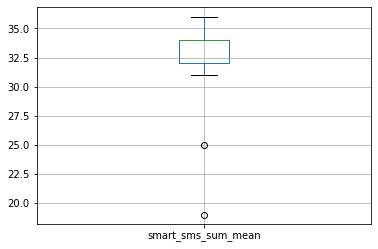

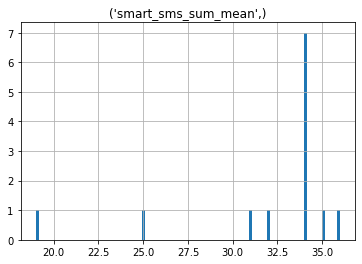

In [21]:
# посмотрим на гистограмму и диаграмму размаха для столбца 'smart_sms_sum_mean'
df_hist('smart_sms_sum_mean')

В большей части для абонентов тарифного плана smart нормальное число сообщений в месяц колеблется в диапазоне от 31 до 36.
Самое частое число смс 34.

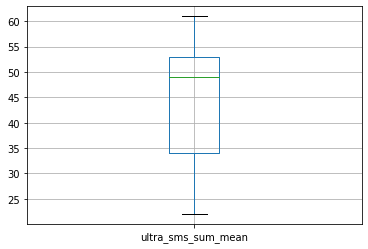

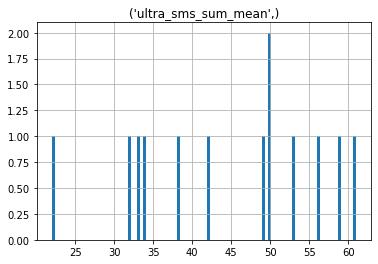

In [22]:
# посмотрим на гистограмму и диаграмму размаха для столбца 'ultra_sms_sum_mean'
df_hist('ultra_sms_sum_mean')

Для абонентов тарифного плана ultra, тяжело выделить популярное число смс. Из месяца в месяц значения различаются, и они относительно равноудалены друг от друга, выделить какой-то сектор тяжело. В среднем имеем 44 смс в месяц со средним отклонением в 43.

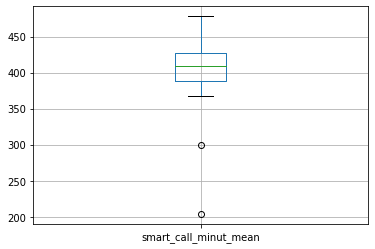

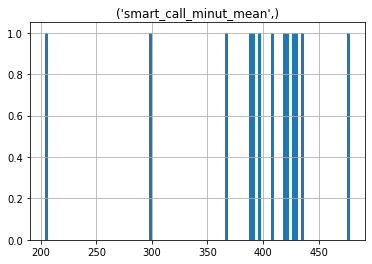

In [23]:
# посмотрим на гистограмму и диаграмму размаха для столбца 'smart_call_sum_mean'
df_hist('smart_call_minut_mean')

В большей части для абонентов тарифного плана smart нормальное число минут в месяц колеблется в диапазоне от 365 до 480.
Заметно сгущение столбцов в близи 400 минут (380 - 430).

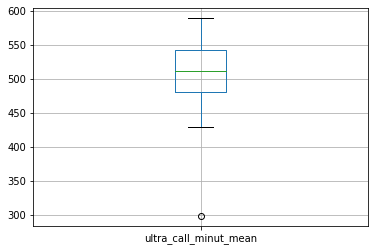

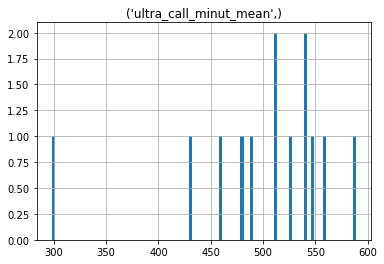

In [24]:
# посмотрим на гистограмму и диаграмму размаха для столбца 'smart_sms_sum_mean'
df_hist('ultra_call_minut_mean')

В большей части для абонентов тарифного плана ultra нормальное число минут в месяц колеблется в диапазоне 500 (совпадает со средним) в приделах 10-15%. 
Самое частое число минут 510 и 540.

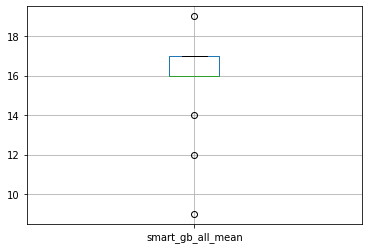

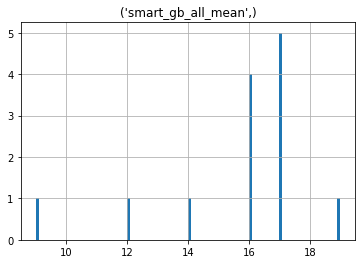

In [25]:
# посмотрим на гистограмму и диаграмму размаха для столбца 'smart_sms_sum_mean'
df_hist('smart_gb_all_mean')

В большей части для абонентов тарифного плана smart самые частые числа потраченных гигабайт в месяц колеблется в диапазоне от 16±3. 
Самое частое число потраченных 16-17 гигобайт. 

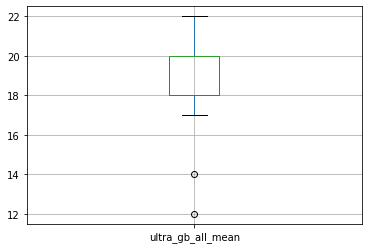

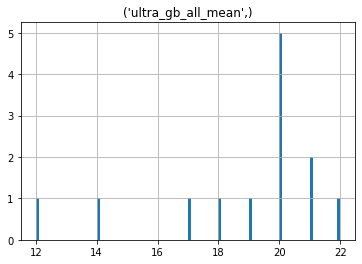

In [26]:
# посмотрим на гистограмму и диаграмму размаха для столбца 'smart_sms_sum_mean'
df_hist('ultra_gb_all_mean')

В большей части для абонентов тарифного плана smart сгущение данных образуется чисел потраченных гигабайт в месяц колеблется в диапазоне от 17 до 22. 
Самое частое число потраченных 20 и 21 гигабайт.  

In [27]:
#  КОД РЕВЬЮВЕРА
# Есть три таблицы, проверим сколько УНИКАЛЬНЫХ пользователей в каждой
for df, name in zip([df_calls, df_internet, df_messages], ['Calss', 'Gb', 'Msg']):
    print(f"Датасет: {name}, число УНИКОВ: {df['user_id'].nunique()}")
    print(f"Датасет: {name}, размер: {df.shape}")

Датасет: Calss, число УНИКОВ: 492
Датасет: Calss, размер: (202607, 5)
Датасет: Gb, число УНИКОВ: 497
Датасет: Gb, размер: (149396, 6)
Датасет: Msg, число УНИКОВ: 426
Датасет: Msg, размер: (123036, 4)


In [28]:
df_internet

,Unnamed: 0,id,mb_used,session_date,user_id,session_date_month
0,0,1000_0,112,2018-11-25,1000,11
1,1,1000_1,1052,2018-09-07,1000,9
2,2,1000_2,1197,2018-06-25,1000,6
3,3,1000_3,550,2018-08-22,1000,8
4,4,1000_4,302,2018-09-24,1000,9
...,...,...,...,...,...,...
149391,149391,1499_152,318,2018-10-03,1499,10
149392,149392,1499_153,490,2018-12-14,1499,12
149393,149393,1499_154,0,2018-10-27,1499,10
149394,149394,1499_155,1246,2018-11-26,1499,11


## Формулирование и проверка гипотез

Сформулируем гипотезы исходя из задания :
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

1 гипотеза.
- H₀: средняя выручка пользователей тарифов «Смарт» равна средней выручке тарифного плана «Ультра»
- H₁: средняя выручка пользователей тарифов «Смарт» не равна средней выручка тарифного плана «Ультра»

2 гипотеза:
- H₀: средняя выручка пользователей из Москвы равна средней выручке пользователей из регионов.
- H₁: средняя выручка пользователей из Москвы не равна средней выручке пользователей из регионов.

Поскольку важно узнать различаются ли средние выручки, и не важно в большую или меньшую сторону, то тест будем проводить двусторонний.

In [37]:
def h0(average_revenue, interested_value):
    alpha = .05 # критический уровень статистической значимости
    results = st.ttest_ind(average_revenue, interested_value)
    print('p-значение:', results.pvalue)
    if results.pvalue < alpha:
        print("Отвергаем нулевую гипотезу")
    else:
        print("Не получилось отвергнуть нулевую гипотезу") 

In [38]:
h0(data_smart, data_ultra)

p-значение: 8.822504084929385e-24
Отвергаем нулевую гипотезу


In [39]:
h0(data_moscow, data_not_moscow)

p-значение: 0.0018834397522731062
Отвергаем нулевую гипотезу


Гипотезу о том, средняя выручка пользователей тарифов «Смарт» равна средней выручке тарифного плана «Ультра», стоит отвергнуть.

Гипотезу о том, что средняя выручка пользователей из Москвы равна средней выручке пользователей из регионов, стоит отвергнуть.

## Общий вывод

- Абонентам тарифного плана смарт зачастую не хватает выделенных им смс, минут разговора и интернет трафика, в отличии от абонентов тарифного плана ультра, которые практически не выходят за рамки выделенных им лимитов. 
- Абоненты тарифного плана ультра тратят практически в два раза больше смс, чем абоненты тарифного плана смарт. 
- В среднем абоненты обоих тарифных планов не выходят за границы предоставленных им бесплатных минут внутри сети. Но абоненты тарифного плана смарт находятся в большей степени на верхней границе лимита, в отличии от абонентов тарифа ультра.
- Абоненты тарифного плана ультра не вылазят за границы предоставленного им интернет трафика, в отличии от абонентов тарифного плана смарт, которые частенько выходят за границы предоставленного лимита.
- В среднем жители Москвы тратят приблизительно столько же денежных средств на сотовую связь, как и жители регионов.
- А абоненты разных предоставленных тарифных планов, тратят разные суммы денежных на оплату сотовых услуг.